# ***IRIS CLASSIFICATION***

Develop a ML Model for classifying iris
flowers based on their features using
Python, scikit-learn, and TensorFlow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
# columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class Labels']

# load the data

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df['Species'] = df['Species'].str.replace('Iris-', '')

In [11]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [12]:
missing_values = df.isnull().sum()
per_miss = (missing_values/len(df))*100
pd.DataFrame({'missing_values': missing_values, 'per_miss': per_miss})

,missing_values,per_miss
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


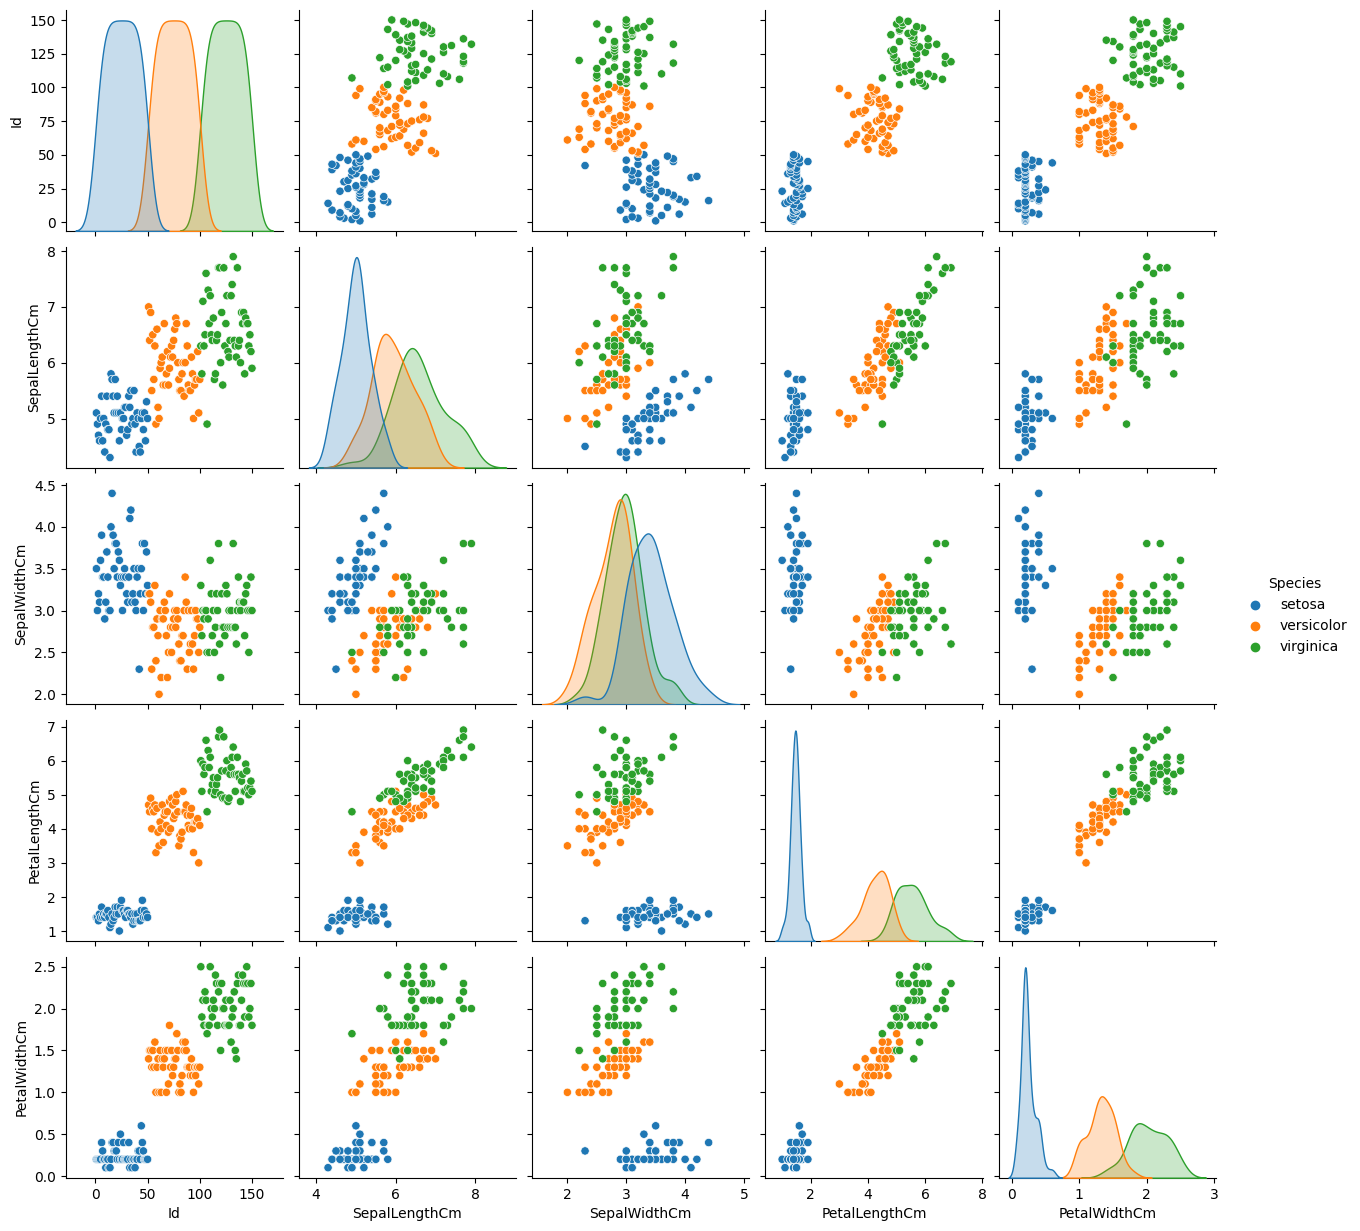

In [13]:
# visualize the dataset again
sns.pairplot(df, hue='Species')
plt.show()

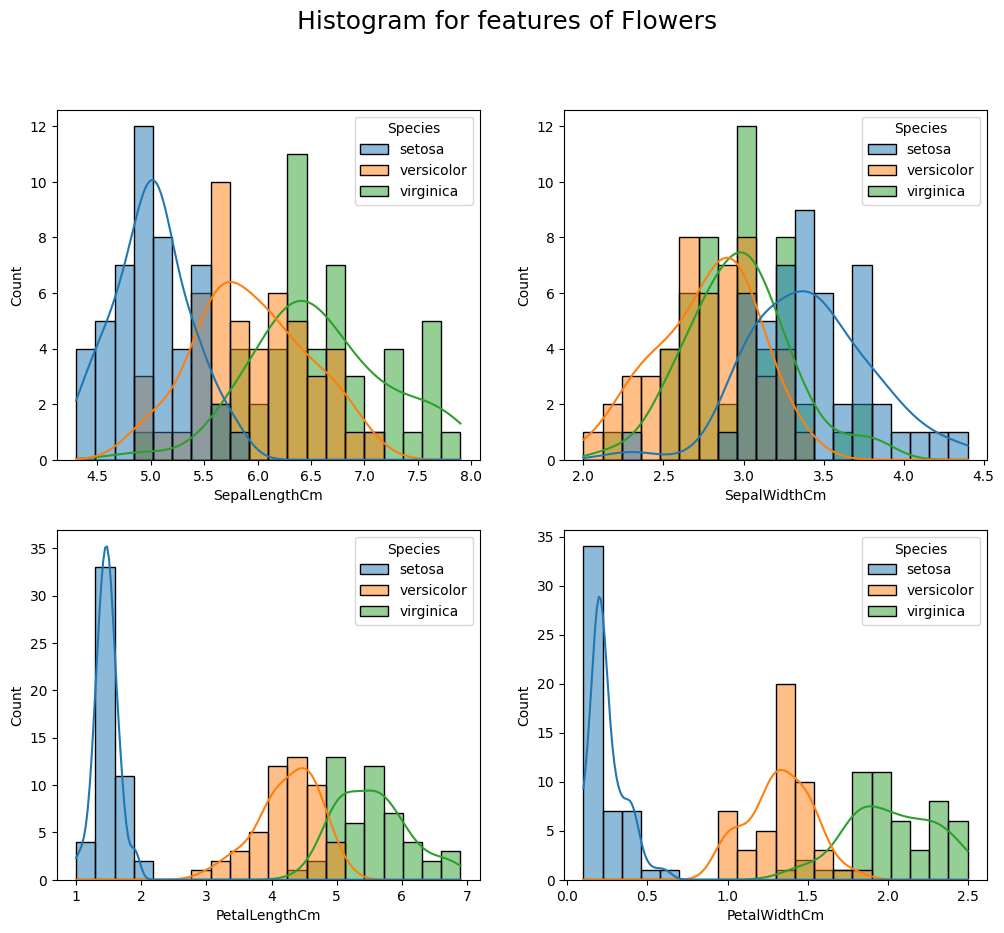

In [15]:
num_col = list(df.select_dtypes(include=['float']).columns)
num = int(len(num_col)/2) if int(len(num_col)/2) > 1 else 2
fig, ax = plt.subplots(num, num, figsize=(12,10))

for j in range(num):
  for i in range(num):
    try:
      sns.histplot(data = df, x = num_col[0], kde = True, bins=20, hue='Species', ax = ax[j][i])
      num_col.pop(0)
    except:
      fig.delaxes(ax = ax[j][i])
fig.suptitle('Histogram for features of Flowers', fontsize = 18)
plt.show()


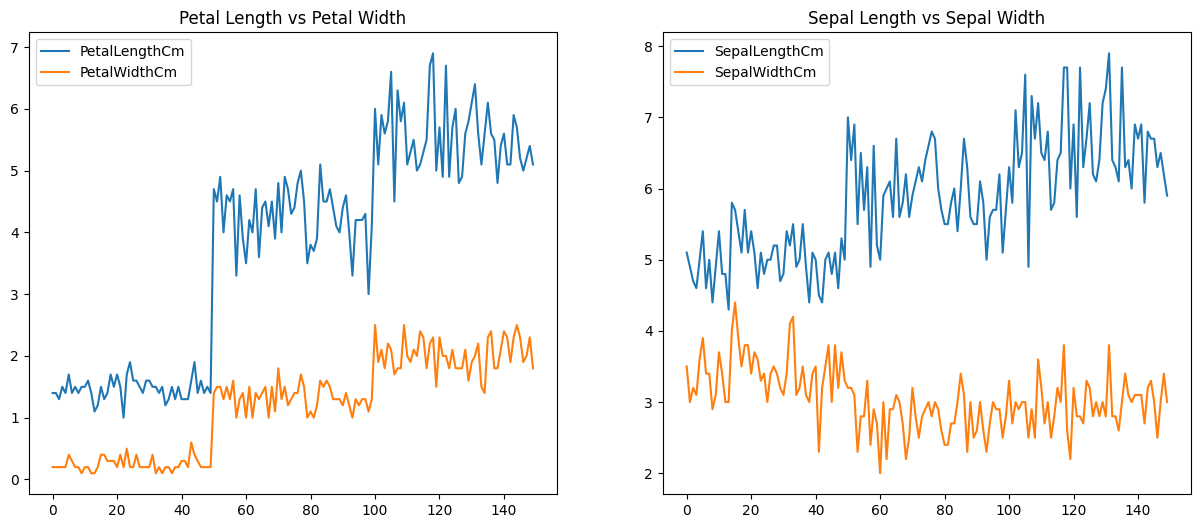

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(df['PetalLengthCm'])
ax[0].plot(df['PetalWidthCm'])
ax[0].set_title('Petal Length vs Petal Width')
ax[0].legend(['PetalLengthCm', 'PetalWidthCm'])
ax[1].plot(df['SepalLengthCm'])
ax[1].plot(df['SepalWidthCm'])
ax[1].set_title('Sepal Length vs Sepal Width')
ax[1].legend(['SepalLengthCm', 'SepalWidthCm'])

plt.show()

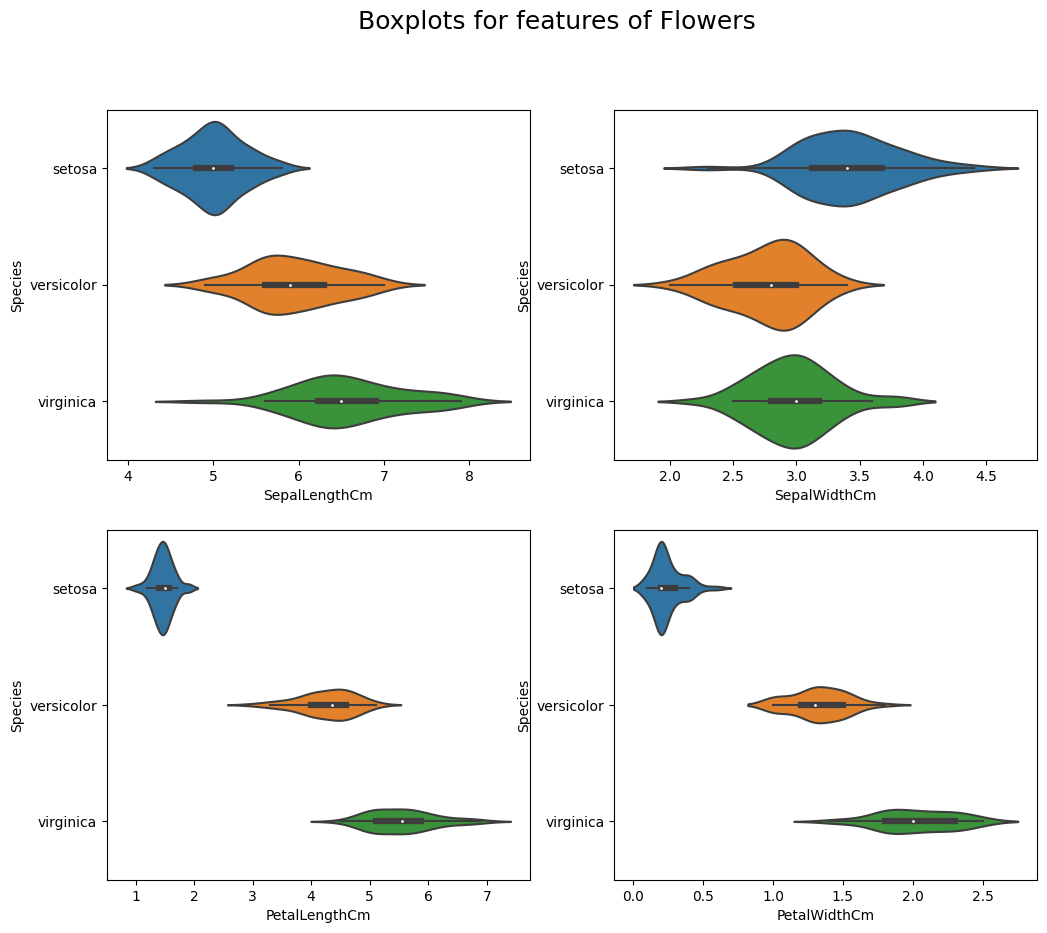

In [17]:
num_col = list(df.select_dtypes(include=['float']).columns)
num = int(len(num_col)/2) if int(len(num_col)/2) > 1 else 2
fig, ax = plt.subplots(num, num, figsize=(12,10))

for j in range(num):
  for i in range(num):
    try:
      sns.violinplot(data = df, x = num_col[0], y='Species' , ax = ax[j][i])
      num_col.pop(0)
    except:
      fig.delaxes(ax = ax[j][i])
fig.suptitle('Boxplots for features of Flowers', fontsize = 18)
plt.show()

# **MODEL TRAINING**
Using **scikit-learn** for traditional machine learning:

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Encode the target variable 'species' using LabelEncoder
df['Species'] = LabelEncoder().fit_transform(df['Species'])

# Separate features (X) and target variable (y)
X = df.drop('Species', axis=1)
y = df['Species']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
# lg = LogisticRegression()

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train Logistic Regression, Decision Tree, K Neighbour, Random Forest Classifiers
lg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#rf.fit(X_train, y_train)



In [33]:
models = [lg, dt, knn, rf]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy score of {model} is {accuracy}')

Accuracy score of LogisticRegression() is 1.0
Accuracy score of DecisionTreeClassifier() is 1.0
Accuracy score of KNeighborsClassifier() is 1.0
Accuracy score of RandomForestClassifier(random_state=42) is 1.0


### **MODEL TRAINING**

Using **TensorFlow** for a neural network-based approach:

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [57]:
# Create and train a neural network model using TensorFlow
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(5, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)



In [58]:
# Evaluate the neural network model
y_pred_probs = model.predict(X_test)
y_pred_nn = tf.argmax(y_pred_probs, axis=1).numpy()

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Accuracy score of Neural Network is {accuracy_nn}')

# Print classification report for Neural Network
print("\nClassification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))




1/1 [==============================] - 0s 92ms/step
Accuracy score of Neural Network is 0.8666666666666667

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.56      0.71         9
           2       0.79      1.00      0.88        11

    accuracy                           0.87        30
   macro avg       0.90      0.85      0.85        30
weighted avg       0.89      0.87      0.85        30

